# Aufgabe 5: Lichtstrahl durch Atmosphäre (10$\,$pt) ***

Bestimmen Sie numerisch durch ein kleines Computerprogramm den Weg eines Lichtstrahls von einem Punkt A zu einem $100 \, \mathrm{km}$ entfernten Punkt B durch die Atmosphäre. Der Brechungsindex $n$ der Atmosphäre ist mit ihrer Dichte $\rho$ korreliert. Es gilt

$$ \frac{n(h, \, T, \, \dots)-1}{n_0(h_0, \, T_0, \, \dots)-1} = \frac{\rho(h, \, T, \, \dots)}{\rho_0(h_0, \, T_0, \, \dots)} $$

Nehmen Sie konstante Temperatur an und benutzen Sie die barometrische Höhenformel. Die Punkte A und B liegen auf gleicher Höhe. Vernachlässigen Sie die Erdkrümmung!
Wie lang ist der optische Lichtweg? Vergleichen sie den sich ergebenden optischen Weg mit der Erwartung für ein homogenes Medium!

Für $T = \mathrm{const}$ gilt
$$ \rho(h) = \rho_0 e^{-\frac{\rho_0 g}{p_0}(h)} $$

### Imports

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Konstanten

In [2]:
# Baro Formel
p0 = 101325 # Pa
rho0 = 1.292 # kg m^-3
g = 9.81 # m s^-2
H = (p0)/(rho0*g) * 1e-3 # km

# Brechungsindex Meereshöhe
n0 = 1.00029

# Höhe
h0 = 5.0 # km

# Stützstellen
L = 100.0 # km
N = 100 + 1

Für $n$ gilt also (mit $H = \frac{p_0}{\rho_0 g})$
$$ n(h) =  (n_0-1) e^{-\frac{h}{H}} + 1$$
mit $h$ die Höhe über dem Meeresspiegel

### Brechnungsindex als Funktion der Höhe

In [3]:
def n(h):
    return (n0-1.)*np.exp(-h/H) + 1

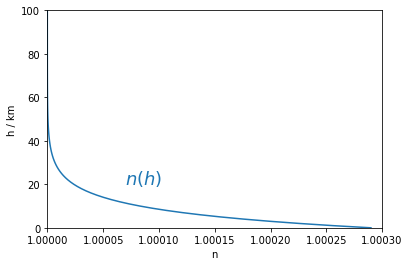

In [4]:
hs = np.linspace(0, 100, N) # km
ns = n(hs)

fig, ax = plt.subplots()
ax.plot(ns, hs)
ax.set_xlabel("n")
ax.set_ylabel("h / km")
ax.set_ylim(0, 100)
ax.set_xlim(1, 1.0003)
ax.text(1.00007, 20, "$n(h)$", color="C0", size=18)
ax.ticklabel_format(axis="x", useOffset=False)

### Approximation durch Stützstellen
X-Achse entlang der geraden Strecke. Stützstellen bei $x_A, x_1, x_2, \dots, x_B$.

$l_{\mathrm{optik}} = \int\limits_A^B n(\vec{s}(t)) \, \left| \frac{d\vec{s}(t)}{dt} \right| dt$ \
$ = \int\limits_{x_A}^{x_1} n(\vec{s}(x))  \left| \frac{d\vec{s}(t)}{dx} \right| dx + \int\limits_{x_1}^{x_2} n(\vec{s}(x)) \left| \frac{d\vec{s}(x)}{dx} \right| dx + \dots + \int\limits_{x_N}^{x_B} n(\vec{s}(x)) \left| \frac{d\vec{s}(x)}{dx} \right| dx$ \
Mit dem Mittelwertsatz gilt $\int\limits_{x_i}^{x_{i+1}} n(\vec{s}(x)) \left| \frac{d\vec{s}(x)}{dx} \right| dx = \left( x_{i+1} - x_i \right) \cdot \overline{ n(\vec{s}(x)) \left| \frac{d\vec{s}(x)}{dx} \right| } \approx \overline{ n(\vec{s})} \left( x_{i+1} - x_i \right) \overline{\left| \frac{d\vec{s}(x)}{dx} \right| } $ \
$\approx  n \left( \overline{\vec{s_i}} \right) s_i $ mit der Teilwegstrecke $s_i$.

In [5]:
xs = np.linspace(0, L, N)
hs = np.full(N, h0) # zu Beginn sind alle Stuetzstellen auf der Höhe h0

In [6]:
def optischeWeglaenge(h, x):
    # Randstück bei A
    s0 = np.sqrt(x[0]**2 + (h[0]-h0)**2)
    n0 = n(0.5*(h[0]+h0))
    
    # Mittelteile
    s = np.sqrt(np.diff(x)**2 + np.diff(h)**2)
    h_mittel = 0.5*(h[1:]+h[:-1])
    ns = n(h_mittel)
    
    # Randstück bei B
    sN = np.sqrt((L-x[-1])**2 + (h[-1]-h0)**2)
    nN = n(0.5*(h[-1]+h0))
    
    return s0*n0 + (s*ns).sum() + sN*nN

### Optische Weglänge bei gerader Strecke

In [7]:
print("%.6f km" % optischeWeglaenge(hs, xs))

100.015516 km


### Lichtweg

In [8]:
res = minimize(optischeWeglaenge, hs[1:-1], args=(xs[1:-1]))

print(res.message)
print("%.6f km" % res.fun)
h_stuetz = res.x

Optimization terminated successfully.
100.015500 km


Text(100.0, 0.01, 'B')

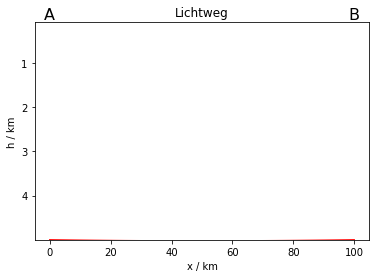

In [9]:
hres = np.concatenate(([h0], h_stuetz, [h0])).copy()

fig, ax = plt.subplots()
ax.plot(xs, hres, color="red")
ax.set_ylim(ymax=0.08)
ax.ticklabel_format(axis="both", useOffset=False)
ax.set_xlabel("x / km")
ax.set_ylabel("h / km")
ax.set_title("Lichtweg")
ax.text(0, 0.01, "A", size=16, horizontalalignment="center")
ax.text(L, 0.01, "B", size=16, horizontalalignment="center")